In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [22]:
file_path = 'force2020_data_unsupervised_learning.csv'
data = pd.read_csv(file_path)

In [23]:
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

In [24]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data_imputed)

Why RobustScaler and Median ?

Better Cluster Separation:
DBSCAN's ability to separate clusters depends on both the ε (epsilon) parameter (the radius within which points are considered neighbors) and the density of the data. If the data has unequal scales across features, the clustering process may become ineffective because the algorithm will overemphasize certain features in determining cluster membership.
By applying the Robust Scaler, the data is better balanced, allowing DBSCAN to perform clustering based on the true underlying structure of the data. This can lead to more compact and well-separated clusters, which directly results in a higher silhouette score (a measure of how similar an object is to its own cluster compared to other clusters).

In [25]:
import time
start_time = time.time()
eps = .9 # Set neighborhood radius
min_samples = 5  # Set minimum number of samples per cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)
end_time = time.time()
execution_time = end_time - start_time


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm that groups together points that are closely packed while marking points in low-density regions as outliers (noise). Unlike k-means, DBSCAN does not require specifying the number of clusters beforehand and can identify clusters of arbitrary shapes, which makes it highly useful for real-world data that may not follow spherical or elliptical patterns.

ε (epsilon): The maximum radius of the neighborhood around a point to consider it for clustering.

MinPts: The minimum number of points required to form a dense region (cluster).

In [26]:
#analyze the results
unique_labels = np.unique(dbscan_labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise
num_noise = np.sum(dbscan_labels == -1)
print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise}")

Number of clusters: 5
Number of noise points: 37


In [27]:
if num_clusters > 1:
    silhouette_avg = silhouette_score(data_scaled, dbscan_labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    silhouette_avg = None
    print("Silhouette Score cannot be computed (only one cluster or all points are noise).")

Silhouette Score: 0.6493646853350314


No need to specify the number of clusters: Unlike k-means, which requires the number of clusters to be specified, DBSCAN automatically finds the number of clusters based on density.

Can find arbitrarily shaped clusters: DBSCAN is very effective for clustering non-spherical shapes, such as clusters with varying density.

Handles noise well: DBSCAN can identify outliers as noise points and can separate them from the clusters.

In [28]:
# Dimensionality reduction for visualization (using PCA)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

C:\Users\dell\AppData\Local\Temp\ipykernel_15152\2028171811.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


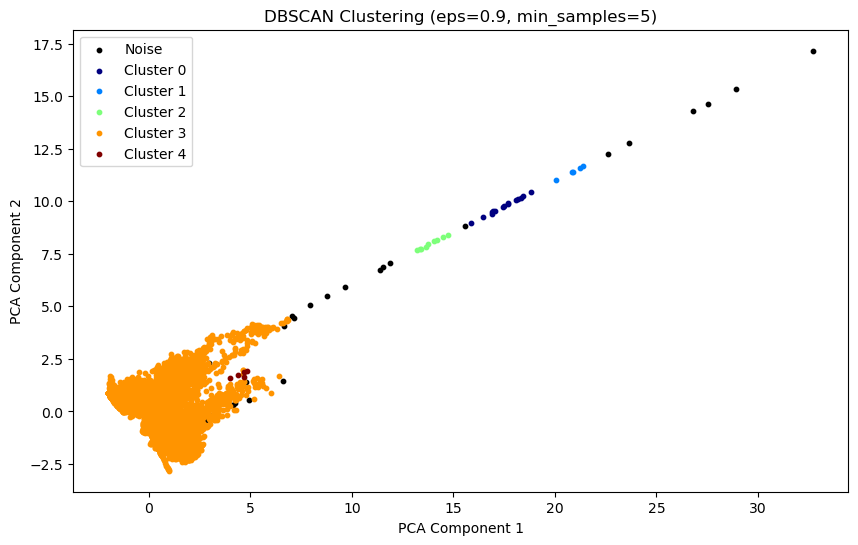

In [29]:
plt.figure(figsize=(10, 6))
for label in unique_labels:
    if label == -1:
        # Noise points
        color = 'k'
        label_name = 'Noise'
    else:
        color = plt.cm.jet(float(label) / max(unique_labels))  # Color for each cluster
        label_name = f"Cluster {label}"
    plt.scatter(
        data_reduced[dbscan_labels == label, 0],
        data_reduced[dbscan_labels == label, 1],
        c=color,
        label=label_name,
        s=10
    )

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import davies_bouldin_score

# Exclude noise points for DBI calculation
mask = dbscan_labels != -1  # Filter for points not labeled as noise
filtered_data = data_scaled[mask]
filtered_labels = dbscan_labels[mask]

if len(np.unique(filtered_labels)) > 1:  # Ensure there are at least 2 clusters
    dbi_dbscan = davies_bouldin_score(filtered_data, filtered_labels)
    print(f"Davies-Bouldin Index for DBSCAN: {dbi_dbscan}")
else:
    print("Davies-Bouldin Index cannot be computed (only one cluster or insufficient points after filtering noise).")

print(f"Execution Time for dbscan: {execution_time:.4f} seconds")


Davies-Bouldin Index for DBSCAN: 0.3106432495331653
Execution Time for dbscan: 3.7089 seconds
